![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 22 - Dimensionality Reduction</center>
### <center> MDS</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/22_DimensionalityReduction/MainMDS.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})
# np.random.seed(2)

### Load S curve data:

In [2]:
from sklearn.datasets import make_s_curve

N      = 500
mX, vC = make_s_curve(N)
mX.shape

(500, 3)

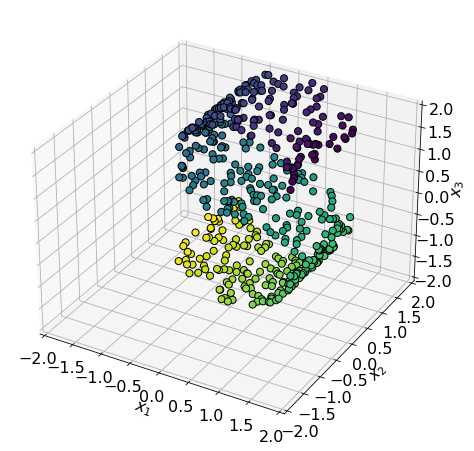

In [3]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(8, 8))
ax  = fig.add_subplot(111, projection='3d')
ax.scatter(mX[:,0], mX[:,1], mX[:,2], s=50, c=vC, edgecolor='k', alpha=1)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
plt.show()

### Classical MDS:
$$\min_{\left\{ \boldsymbol{z}_{i}\in\mathbb{R}^{d}\right\} }\sum_{i=1}^{N}\sum_{j=1}^{N}\left(\boldsymbol{K}_{x}\left[i,j\right]-\left\langle \boldsymbol{z}_{i},\boldsymbol{z}_{j}\right\rangle \right)^{2}$$
1. **set** $\boldsymbol{K}_{x}=-\frac{1}{2}\boldsymbol{J}\boldsymbol{D}_{x}\boldsymbol{J}$  
where $\boldsymbol{J}=\left(\boldsymbol{I}-\frac{1}{N}\boldsymbol{1}\boldsymbol{1}^{T}\right)$
2. Decompose $\boldsymbol{K}_{x}=\boldsymbol{W}\boldsymbol{\Lambda}\boldsymbol{W}$
3. **set** $\boldsymbol{Z}=\boldsymbol{\Lambda}_{d}^{\frac{1}{2}}\boldsymbol{W}_{d}^{T}$

In [4]:
def ClassicalMDS(mD, d):
    N  = mD.shape[0]
    mJ = np.eye(N) - 1 / N * np.ones((N, N))
    mK = -1/2 * mJ @ mD @ mJ
    
    vL, mW = np.linalg.eig(mK) #-- in general, need to make sure to take the largests eigenvalue
    mZ     = mW[:,:d] * np.sqrt(vL[:d])
    return mZ

In [5]:
from scipy.spatial.distance import squareform, pdist

mEuclidD = squareform(pdist(mX))
mZ1      = ClassicalMDS(mEuclidD**2, 2)

C:\Users\Or\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


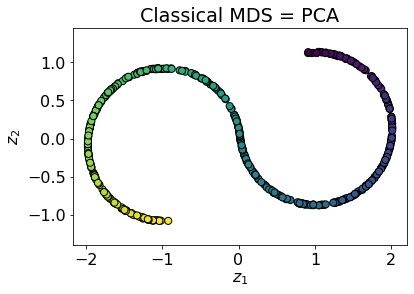

In [6]:
plt.figure()
plt.scatter(mZ1[:,0], mZ1[:,1], s=50, c=vC, edgecolor='k')
plt.axis('equal')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.title('Classical MDS = PCA')
plt.show()

### Metric MDS:
$$\min_{\left\{ \boldsymbol{z}_{i}\in\mathbb{R}^{d}\right\} }\sum_{i=1}^{N}\sum_{j=1}^{N}\left(d\left(\boldsymbol{x}_{i},\boldsymbol{x}_{j}\right)-\left\Vert \boldsymbol{z}_{i}-\boldsymbol{z}_{j}\right\Vert _{2}\right)^{2}$$

In [7]:
from scipy.spatial.distance import squareform, pdist
from sklearn.manifold       import MDS

mZ2 = MDS(dissimilarity='precomputed').fit_transform(mEuclidD)

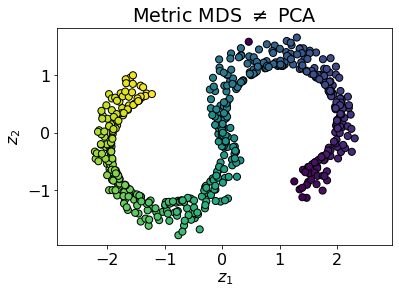

In [8]:
plt.figure()
plt.scatter(mZ2[:,0], mZ2[:,1], s=50, c=vC, edgecolor='k')
plt.axis('equal')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.title(r'Metric MDS $\neq$ PCA')
plt.show()

### Metric MDS with geodesic distance
We have access to the geodesic distance using `vC` (position along the "main" axis)

In [9]:
from scipy.spatial.distance import squareform, pdist

#-- Geodesic distnace (not possible in real datasets):
mGeodesicD = squareform(pdist(np.c_[vC, mX[:,1]]))
mZ3        = MDS(dissimilarity='precomputed').fit_transform(mGeodesicD)

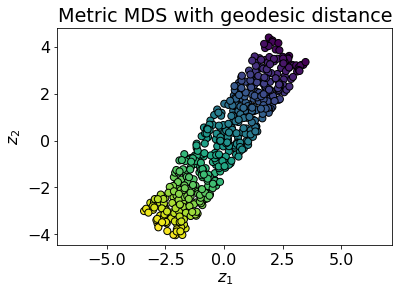

In [10]:
plt.figure()
plt.scatter(mZ3[:,0], mZ3[:,1], s=50, c=vC, edgecolor='k')
plt.axis('equal')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.title(r'Metric MDS with geodesic distance')
plt.show()

C:\Users\Or\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


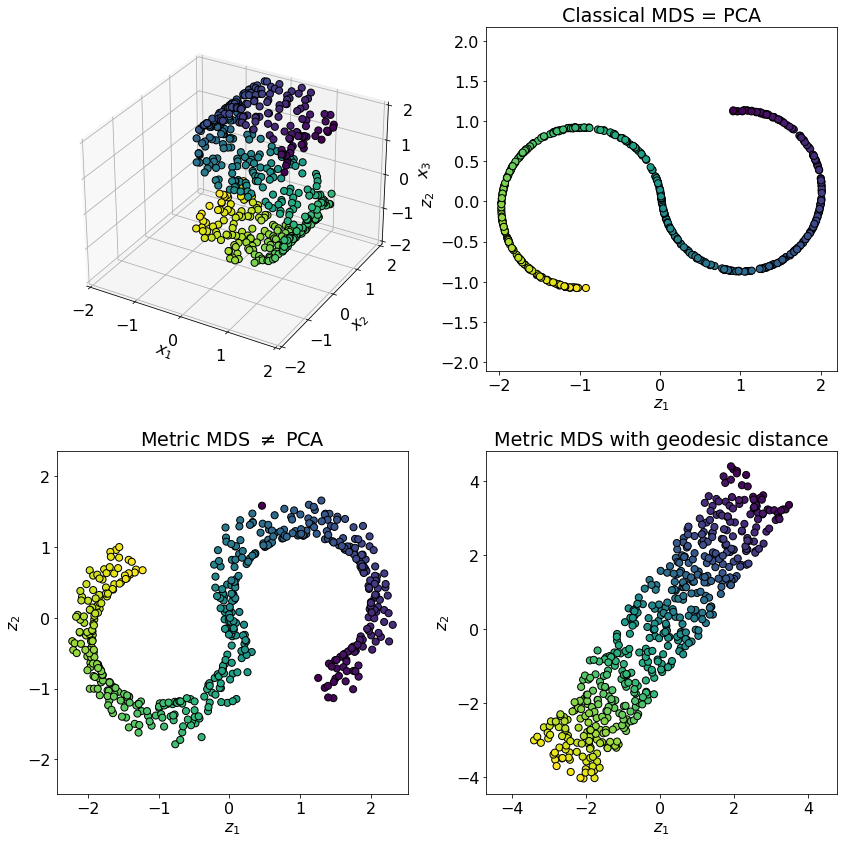

In [11]:
fig = plt.figure(figsize=(12, 12))
ax  = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter(mX[:,0], mX[:,1], mX[:,2], s=50, c=vC, edgecolor='k', alpha=1)
ax.set_xlabel('$x_1$'); ax.set_xlim([-2, 2])
ax.set_ylabel('$x_2$'); ax.set_ylim([-2, 2])
ax.set_zlabel('$x_3$'); ax.set_zlim([-2, 2])

dArgs = {'s':50, 'c':vC, 'edgecolor':'k'}

ax = fig.add_subplot(2,2,2); ax.scatter(*mZ1.T, **dArgs); ax.axis('equal'); ax.set_xlabel('$z_1$'); ax.set_ylabel('$z_2$'); ax.set_title('Classical MDS = PCA')
ax = fig.add_subplot(2,2,3); ax.scatter(*mZ2.T, **dArgs); ax.axis('equal'); ax.set_xlabel('$z_1$'); ax.set_ylabel('$z_2$'); ax.set_title(r'Metric MDS $\neq$ PCA')
ax = fig.add_subplot(2,2,4); ax.scatter(*mZ3.T, **dArgs); ax.axis('equal'); ax.set_xlabel('$z_1$'); ax.set_ylabel('$z_2$'); ax.set_title(r'Metric MDS with geodesic distance')
plt.tight_layout()
plt.show()
